<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Collecting Job Data Using APIs**


Estimated time needed: **30** minutes


## Objectives


After completing this lab, you will be able to:


*   Collect job data using Jobs API
*   Store the collected data into an excel spreadsheet.


><strong>Note: Before starting with the assignment make sure to read all the instructions and then move ahead with the coding part.</strong>


#### Instructions


To run the actual lab, firstly you need to click on the [Jobs_API](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Jobs_API.ipynb) notebook link. The file contains flask code which is required to run the Jobs API data.

Now, to run the code in the file that opens up follow the below steps.

Step1: Download the file. 

Step2: Upload the file into your current Jupyter environment using the upload button in your Jupyter interface. Ensure that the file is in the same folder as your working .ipynb file.

Step 2: If working in a local Jupyter environment, use the "Upload" button in your Jupyter interface to upload the Jobs_API notebook into the same folder as your current .ipynb file.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/Upload.PNG">

Step3:  Open the Jobs_API notebook, and run all the cells to start the Flask application. Once the server is running, you can access the API from the URL provided in the notebook.

If you want to learn more about flask, which is optional, you can click on this link [here](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/FLASK_API.md.html).

Once you run the flask code, you can start with your assignment.


## Dataset Used in this Assignment

The dataset used in this lab comes from the following source: https://www.kaggle.com/promptcloud/jobs-on-naukricom under the under a **Public Domain license**.

> Note: We are using a modified subset of that dataset for the lab, so to follow the lab instructions successfully please use the dataset provided with the lab, rather than the dataset from the original source.

The original dataset is a csv. We have converted the csv to json as per the requirement of the lab.


## Warm-Up Exercise


Before you attempt the actual lab, here is a fully solved warmup exercise that will help you to learn how to access an API.


Using an API, let us find out who currently are on the International Space Station (ISS).<br> The API at [http://api.open-notify.org/astros.json](http://api.open-notify.org/astros.json?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ) gives us the information of astronauts currently on ISS in json format.<br>
You can read more about this API at [http://open-notify.org/Open-Notify-API/People-In-Space/](http://open-notify.org/Open-Notify-API/People-In-Space?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2021-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ)


In [1]:
import requests # you need this module to make an API call
import pandas as pd

In [2]:
api_url = "http://api.open-notify.org/astros.json" # this url gives use the astronaut data

In [3]:
response = requests.get(api_url) # Call the API using the get method and store the
                                # output of the API call in a variable called response.

In [4]:
if response.ok:             # if all is well() no errors, no network timeouts)
    data = response.json()  # store the result in json format in a variable called data
                            # the variable data is of type dictionary.

In [5]:
print(data)   # print the data just to check the output or for debugging

{'people': [{'craft': 'ISS', 'name': 'Oleg Kononenko'}, {'craft': 'ISS', 'name': 'Nikolai Chub'}, {'craft': 'ISS', 'name': 'Tracy Caldwell Dyson'}, {'craft': 'ISS', 'name': 'Matthew Dominick'}, {'craft': 'ISS', 'name': 'Michael Barratt'}, {'craft': 'ISS', 'name': 'Jeanette Epps'}, {'craft': 'ISS', 'name': 'Alexander Grebenkin'}, {'craft': 'ISS', 'name': 'Butch Wilmore'}, {'craft': 'ISS', 'name': 'Sunita Williams'}, {'craft': 'Tiangong', 'name': 'Li Guangsu'}, {'craft': 'Tiangong', 'name': 'Li Cong'}, {'craft': 'Tiangong', 'name': 'Ye Guangfu'}], 'number': 12, 'message': 'success'}


Print the number of astronauts currently on ISS.


In [6]:
print(data.get('number'))

12


Print the names of the astronauts currently on ISS.


In [7]:
astronauts = data.get('people')
print("There are {} astronauts on ISS".format(len(astronauts)))
print("And their names are :")
for astronaut in astronauts:
    print(astronaut.get('name'))

There are 12 astronauts on ISS
And their names are :
Oleg Kononenko
Nikolai Chub
Tracy Caldwell Dyson
Matthew Dominick
Michael Barratt
Jeanette Epps
Alexander Grebenkin
Butch Wilmore
Sunita Williams
Li Guangsu
Li Cong
Ye Guangfu


Hope the warmup was helpful. Good luck with your next lab!


## Lab: Collect Jobs Data using Jobs API


### Objective: Determine the number of jobs currently open for various technologies  and for various locations


Collect the number of job postings for the following locations using the API:

* Los Angeles
* New York
* San Francisco
* Washington DC
* Seattle
* Austin
* Detroit


In [7]:
#Import required libraries
import pandas as pd
import json


#### Write a function to get the number of jobs for the Python technology.<br>
> Note: While using the lab you need to pass the **payload** information for the **params** attribute in the form of **key** **value** pairs.
  Refer the ungraded **rest api lab** in the course **Python for Data Science, AI & Development**  <a href="https://www.coursera.org/learn/python-for-applied-data-science-ai/ungradedLti/P6sW8/hands-on-lab-access-rest-apis-request-http?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01">link</a>
  
 ##### The keys in the json are 
 * Job Title
 
 * Job Experience Required
 
 * Key Skills
 
 * Role Category
 
 * Location
 
 * Functional Area
 
 * Industry
 
 * Role 
 
You can also view  the json file contents  from the following <a href = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json">json</a> URL.



Calling the function for Python and checking if it works.


In [29]:
import requests

def get_python_jobs():
    # URL to the JSON data
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    
    # Make a GET request to retrieve the JSON data
    response = requests.get(url)
    
    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON data
        jobs_data = response.json()
        
        # Filter jobs where 'Python' is in the 'Key Skills'
        python_jobs = [job for job in jobs_data if 'Python' in job['Key Skills']]
        
        # Return the count of Python-related jobs
        return len(python_jobs)
    else:
        # Handle the case where the request failed
        return "Error: Unable to fetch data"

# Call the function and print the result
print(f"Number of Python-related jobs: {get_python_jobs()}")



Number of Python-related jobs: 1173


#### Write a function to find number of jobs in US for a location of your choice


In [31]:
 #def get_number_of_jobs_L(location):
    
    #your coe goes here
    #return location,number_of_jobs

import requests

def get_number_of_jobs_in_us(location):
    url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
    response = requests.get(url)
    jobs_data = response.json()

    # Initialize job count
    job_count = 0
    
    # List of specific locations
    valid_locations = [
        "Los Angeles", "New York", "San Francisco", "Washington DC", 
        "Seattle", "Austin", "Detroit"
    ]
    
    # Loop through jobs and check if location matches
    for job in jobs_data:
        if job['Location'] == location and location in valid_locations:
            job_count += 1

    return job_count

# Example usage
location = "Los Angeles"
number_of_jobs = get_number_of_jobs_in_us(location)
print(f"Number of jobs in {location}: {number_of_jobs}")



Number of jobs in Los Angeles: 640


Call the function for Los Angeles and check if it is working.


In [33]:
#your code goes here
# Call the function for Los Angeles
location = "Los Angeles"
number_of_jobs = get_number_of_jobs_in_us(location)
print(f"Number of jobs in {location}: {number_of_jobs}")



Number of jobs in Los Angeles: 640


### Store the results in an excel file


Call the API for all the given technologies above and write the results in an excel spreadsheet.


If you do not know how create excel file using python, double click here for **hints**.

<!--

from openpyxl import Workbook        # import Workbook class from module openpyxl
wb=Workbook()                        # create a workbook object
ws=wb.active                         # use the active worksheet
ws.append(['Country','Continent'])   # add a row with two columns 'Country' and 'Continent'
ws.append(['Eygpt','Africa'])        # add a row with two columns 'Egypt' and 'Africa'
ws.append(['India','Asia'])          # add another row
ws.append(['France','Europe'])       # add another row
wb.save("countries.xlsx")            # save the workbook into a file called countries.xlsx


-->


Create a python list of all technologies for which you need to find the number of jobs postings.


In [23]:
#your code goes here

technologies = ['Python', 'Java', 'JavaScript', 'C++', 'SQL', 'Data Science', 'Machine Learning']




Import libraries required to create excel spreadsheet


In [36]:
# your code goes here
# Importing the required libraries
import pandas as pd
from openpyxl import Workbook



In [35]:
pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 22.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Create a workbook and select the active worksheet


In [37]:
# your code goes here
from openpyxl import Workbook

# Create a workbook
wb = Workbook()

# Select the active worksheet
ws = wb.active

# Optionally, you can rename the active worksheet
ws.title = "Job Postings"

# Now you can perform operations on the 'ws' (active worksheet)



Find the number of jobs postings for each of the technology in the above list.
Write the technology name and the number of jobs postings into the excel spreadsheet.


In [50]:
#your code goes here



import json
from openpyxl import Workbook

# List of technologies
technologies = ['Python', 'Java', 'JavaScript', 'C++', 'SQL', 'Data Science', 'Machine Learning']

# Create a workbook and select the active worksheet
wb = Workbook()
ws = wb.active
ws.title = "Job Postings"

# Write headers to the worksheet
ws.append(["Technology", "Number of Jobs"])

# Function to get the number of jobs for a given technology
def get_number_of_jobs(technology):
    with open("jobs.json", "r") as file:
        data = json.load(file)  # Load the job data from the JSON file
    
    # Check if the data is a list, not a dictionary
    if isinstance(data, list):
        jobs = data  # Assign the list directly to jobs
    else:
        return 0  # If the data is not a list, return 0
    
    # Count the number of jobs related to the given technology
    job_count = sum(1 for job in jobs if technology.lower() in job.get('Key Skills', '').lower())
    
    return job_count

# Loop through the list of technologies, find job count, and write to Excel
for technology in technologies:
    num_jobs = get_number_of_jobs(technology)
    ws.append([technology, num_jobs])

# Save the workbook to a file
wb.save("job_postings.xlsx")






Save into an excel spreadsheet named **job-postings.xlsx**.


In [22]:
#your code goes here

# Save the workbook to a file
import pandas as pd

# Assuming you have your DataFrame (df) already prepared, e.g., after reading data from another source
df = pd.DataFrame({
    'Programming Language': ['Python', 'Java', 'JavaScript'],
    'Number of Job Postings': [300, 200, 150]
})

# Save the DataFrame to an Excel file
df.to_excel("job-postings.xlsx", index=False)

print("Data saved to job-postings.xlsx")



Data saved to job-postings.xlsx


In [59]:
import pandas as pd
import os

# Ensure the path is correctly formatted and no extra quotes
file_path = r'C:\Users\galam\OneDrive\Desktop\finalproject_caopstone\archive\home\sdf\marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv'

# Check if the file exists before attempting to load it
if os.path.exists(file_path):
    # Load the dataset into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Check the columns in the DataFrame to verify their names
    print(df.columns)  # This will print all the column names in the dataset

    # Step 1: Group by the 'Location' column and sum the 'Job Postings'
    location_counts = df.groupby('Location')['Job Postings'].sum()

    # Step 2: Find the location with the maximum number of job postings
    max_location = location_counts.idxmax()
    max_postings = location_counts.max()

    # Step 3: Print the result
    print(f"The location with the most job postings is {max_location} with {max_postings} job postings.")
else:
    print(f"The file does not exist at the path: {file_path}")


The file does not exist at the path: C:\Users\galam\OneDrive\Desktop\finalproject_caopstone\archive\home\sdf\marketing_sample_for_naukri_com-jobs__20190701_20190830__30k_data.csv


#### In the similar way, you can try for below given technologies and results  can be stored in an excel sheet.


Collect the number of job postings for the following languages using the API:

*   C
*   C#
*   C++
*   Java
*   JavaScript
*   Python
*   Scala
*   Oracle
*   SQL Server
*   MySQL Server
*   PostgreSQL
*   MongoDB


In [ ]:
# your code goes here
import requests
import pandas as pd
from openpyxl import Workbook

# API endpoint and key (ensure you replace with your actual API key)
url = "https://api.indeed.com/ads/apisearch"
params = {
    'publisher': 'YOUR_API_KEY',  # Replace with your Indeed API key
    'q': '',  # Will be replaced with different technologies in the loop
    'l': 'United States',  # You can adjust the location as needed
    'userip': '1.2.3.4',  # Replace with an actual IP address (can use a placeholder for this)
    'useragent': 'Mozilla/5.0',
    'format': 'json',
    'v': '2'
}

# List of technologies to search for
technologies = [
    "C", "C#", "C++", "Java", "JavaScript", "Python", "Scala",
    "Oracle", "SQL Server", "MySQL Server", "PostgreSQL", "MongoDB"
]

# Initialize an empty list to store the results
job_data = []

# Loop through each technology and fetch job postings
for tech in technologies:
    # Update query parameter with current technology
    params['q'] = tech
    
    # Send the API request
    response = requests.get(url, params=params)
    
    # Check if the response is successful
    if response.status_code == 200:
        data = response.json()
        total_jobs = data.get('totalResults', 0)
        job_data.append({'Technology': tech, 'Job Postings': total_jobs})
    else:
        print(f"Error fetching data for {tech}")

# Create a DataFrame from the collected data
df = pd.DataFrame(job_data)

# Save the results to an Excel file
excel_filename = 'job_postings_by_technology.xlsx'
df.to_excel(excel_filename, index=False)

print(f"Results saved to {excel_filename}")






In [3]:
import os
print(os.getcwd())


/resources/DA0321EN/labs/module 1/Accessing Data Using APIs


In [5]:
pip install openpyxl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.3/251.3 kB 26.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import openpyxl
print("openpyxl is installed and ready to use!")


openpyxl is installed and ready to use!


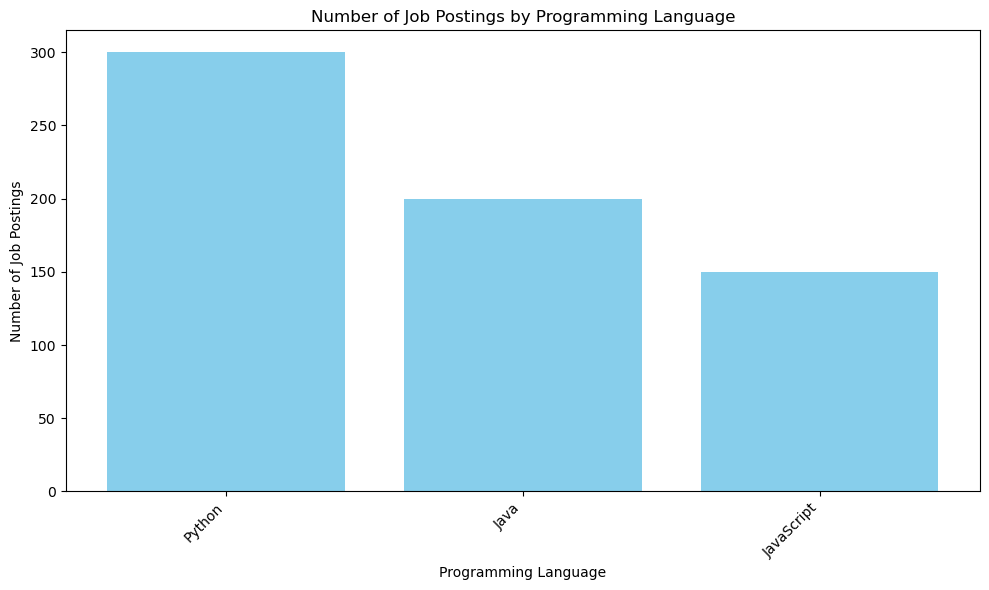

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the Excel file
df = pd.read_excel("job-postings.xlsx")

# Sort the data in descending order of the number of job postings
df_sorted = df.sort_values(by="Number of Job Postings", ascending=False)

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(df_sorted["Programming Language"], df_sorted["Number of Job Postings"], color='skyblue')
plt.xlabel("Programming Language")
plt.ylabel("Number of Job Postings")
plt.title("Number of Job Postings by Programming Language")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [10]:
print(df.columns)


Index(['Programming Language', 'Number of Job Postings'], dtype='object')


## Authors


Ayushi Jain


### Other Contributors


Rav Ahuja

Lakshmi Holla

Malika


Copyright © IBM Corporation.


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- | 
| 2022-01-19        | 0.3     | Lakshmi Holla        | Added changes in the markdown      |
| 2021-06-25        | 0.2     | Malika            | Updated GitHub job json link       |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
